# `6_summary.ipynb`

In this notebook results from all previous notebooks are shown and compared.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from common import read_results

In [3]:
results = pd.read_csv("results.csv")

## `results.csv`

There are all the times we got in the different benchmarks sorted from slowest to fastest.

In [4]:
results

,timestamp,hostname,test,timeit_avg,timeit_std
0,2023-08-28 06:46:08.470641,nid06416,list_pointwise,8.220000,4.830000e-03
1,2023-08-28 06:52:14.407401,nid06416,list_sin_pointwise,14.300000,1.270000e-02
2,2023-08-28 06:53:21.944404,nid06416,array_pointwise,15.000000,1.830000e-02
3,2023-08-28 06:59:04.973466,nid06416,array_sin_pointwise,22.400000,7.560000e-02
4,2023-08-28 06:59:08.424226,nid06416,numpy_pointwise,0.000036,3.180000e-07
5,2023-08-28 06:59:15.692670,nid06416,numpy_sin_pointwise,0.868000,1.670000e-04
6,2023-08-28 07:02:26.281812,nid06416,list_1D_same_col_ZYX,14.900000,8.910000e-03
7,2023-08-28 07:05:10.700202,nid06416,numpy_1D_same_col,0.117000,2.920000e-04
8,2023-08-28 07:10:27.407807,nid06416,list_1D_same_row_ZXY,14.900000,2.050000e-02
9,2023-08-28 07:11:29.792252,nid06416,numpy_1D_same_row,0.105000,1.160000e-05


## Summary plots

In [5]:
def comparison_plot(test_names, times_avg, title=None, save=False):
    assert len(test_names) == len(times_avg)
    assert isinstance(title, str)

    fig, ax = plt.subplots(figsize=(7, 5), dpi=100)

    y_pos = np.arange(len(test_names))

    ax.barh(y_pos, times_avg, align='center')
    ax.set_yticks(y_pos, labels=test_names)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Times (s)')
    ax.set_xscale('log')
    ax.set_xticks(np.logspace(-5, 2, 8))
    ax.set_title(title)
    
    if save:
        filename = title.lower().replace(" ", "_")
        plt.savefig(f"plots/{filename}.png", dpi=300, bbox_inches="tight")
        plt.savefig(f"plots/{filename}.eps", dpi=300, bbox_inches="tight")

### Pointwise copy stencil

In [6]:
test_names = [
    "list_pointwise", "array_pointwise", "numpy_pointwise", "numba_pointwise",
    "numba_parallel_pointwise", "numexpr_pointwise", "gt4py_numpy_pointwise",
    "gt4py_ifirst_pointwise", "gt4py_kfirst_pointwise", "taichi_field_parallel_cpu_pointwise",
    "taichi_field_parallel_gpu_pointwise"
]
times_avg = [read_results(test) for test in test_names]

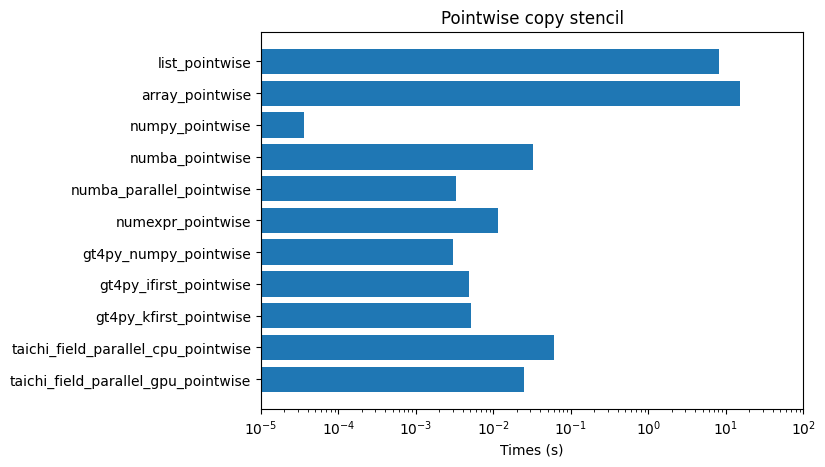

In [7]:
comparison_plot(test_names, times_avg, title="Pointwise copy stencil", save=True)

### Pointwise sine stencil

In [8]:
test_names = [
    "list_sin_pointwise", "array_sin_pointwise", "numpy_sin_pointwise", "numba_sin_pointwise",
    "numba_parallel_sin_pointwise", "numexpr_sin_pointwise", "taichi_field_parallel_cpu_sin_pointwise",
    "taichi_field_parallel_gpu_sin_pointwise"
]
times_avg = [read_results(test) for test in test_names]

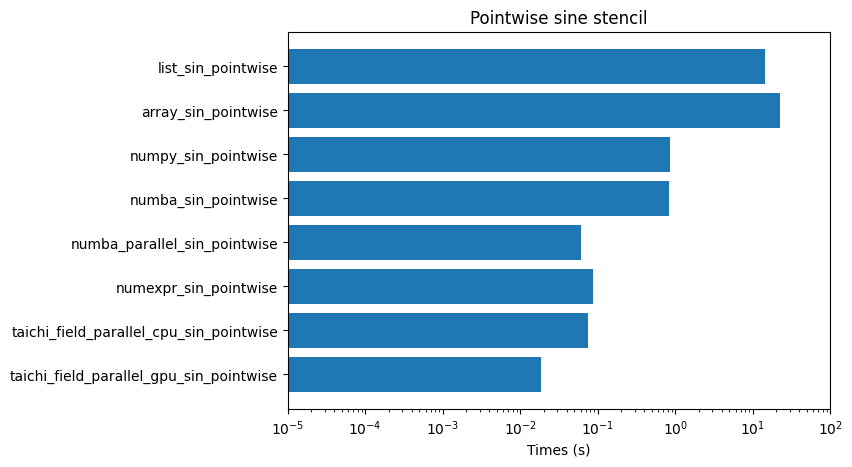

In [9]:
comparison_plot(test_names, times_avg, title="Pointwise sine stencil", save=True)

### 1D stencil

In [10]:
test_names = [
    "list_1D_same_col_ZYX", "numpy_1D_same_col", "numba_1D_same_col", "numexpr_1D_same_col",
    "gt4py_numpy_1D_same_col", "gt4py_ifirst_1D_same_col", "gt4py_kfirst_1D_same_col",
    "taichi_cpu_1D_same_col", "taichi_gpu_1D_same_col"
]
times_avg = [read_results(test) for test in test_names]

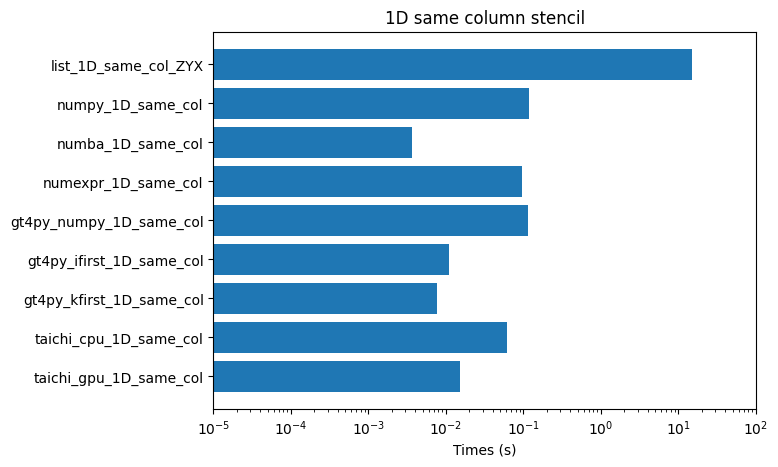

In [11]:
comparison_plot(test_names, times_avg, title="1D same column stencil", save=True)

### 2D stencil

In [12]:
test_names = [
    "numpy_2D", "numba_2D", "gt4py_numpy_2D", "gt4py_ifirst_2D",
    "gt4py_kfirst_2D", "taichi_cpu_2D", "taichi_gpu_2D"
]
times_avg = [read_results(test) for test in test_names]

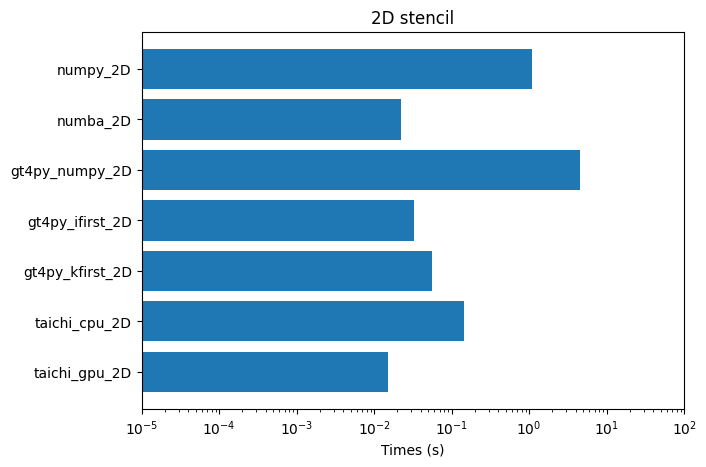

In [13]:
comparison_plot(test_names, times_avg, title="2D stencil", save=True)